# Exercise 14: Mediation

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

1. Simulating data 3/3
2. Visualizing data 2/2
3. Mediation Analysis 4/4
4. Reflection 1/1

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form:
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally:

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms.

In [ ]:
sample_size = 100 # How many children in data set?
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0.
sd_c = 85      # standard dev of gaussian noise term, epsilon_c


simulate_data <- function(sample_size, age_lo, age_hi, beta_xa,
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
      # WRITE YOUR CODE HERE
      # Set a random seed first:
      set.seed(1)

      # Initialize a dataframe
      df <- data.frame(matrix(ncol = 3, nrow = sample_size))
      colnames(df) <- c("Age", "Experience", "Comprehension")

      # Generate the data (with rounding)
      df$Age <- round(runif(sample_size, age_lo, age_hi)) |> as.integer() # generate ages
      df$Experience <- round(beta_xa * df$Age + beta_x0 + rnorm(sample_size, sd = sd_x)) |> as.integer() # generate experiences
      df$Comprehension <- round(beta_ca * df$Age + beta_cx * df$Experience + beta_c0 + rnorm(sample_size, sd = sd_c)) |>
            as.integer() # generate comprehension score

      return(df)
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,Age,Experience,Comprehension
,<int>,<int>,<int>
1,112,71,351
2,125,27,189
3,149,87,363
4,189,33,181
5,104,119,324
6,188,188,633


---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [ ]:
# WRITE YOUR CODE HERE
require(tidyverse)

a) Plot the relationship between age and reading comprehension.

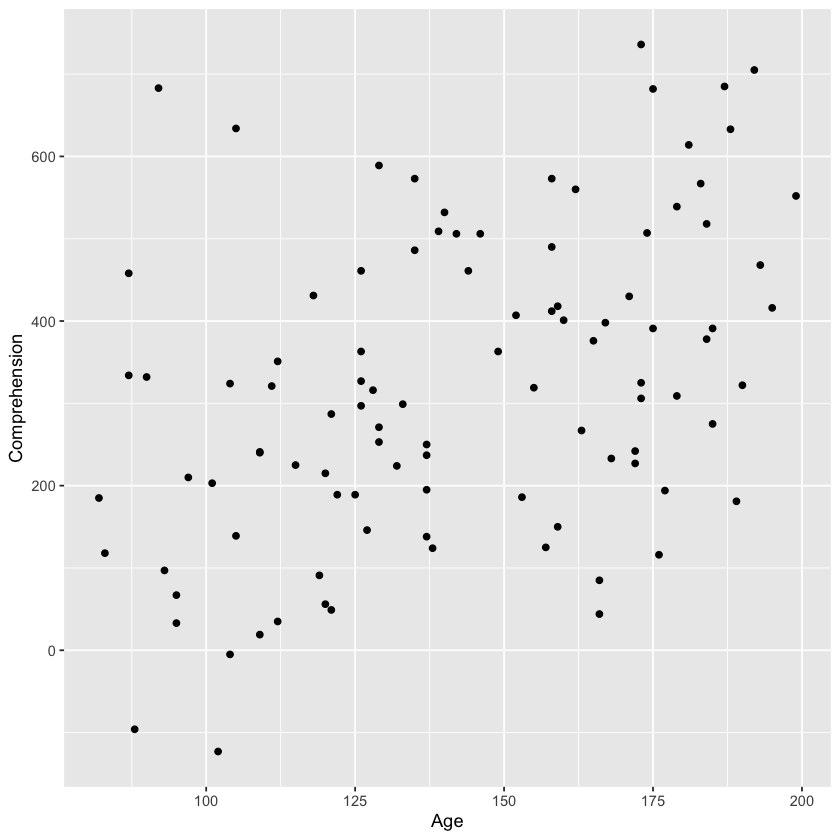

In [ ]:
# WRITE YOUR CODE HERE
ggplot(data = dat, mapping = aes(x = Age, y = Comprehension)) +
    geom_point()

b) Plot the relationship between reading experience, age, and reading comprehension.

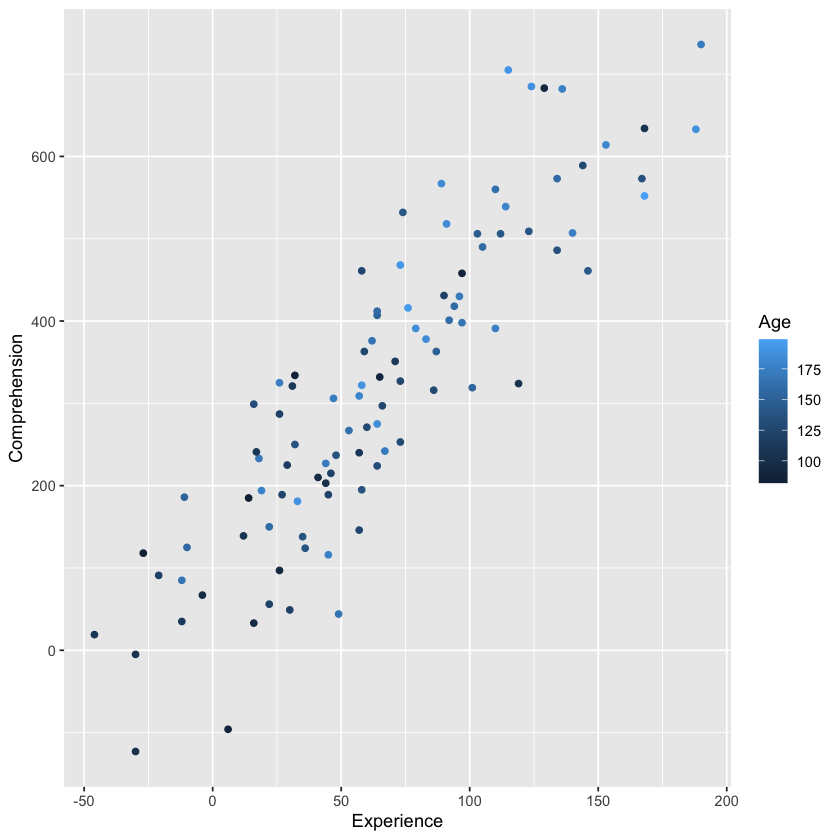

In [ ]:
# WRITE YOUR CODE HERE
ggplot(data = dat, mapping = aes(x = Experience, y = Comprehension, color = Age)) +
    geom_point()


---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [ ]:
# WRITE YOUR CODE HERE
# install.packages("mediation") # uncomment to install the mediation package.
library(mediation)


Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [ ]:
# WRITE YOUR CODE HERE
fitM <- lm(Experience ~ Age, data=dat) #Step 1: IV on M
fitY <- lm(Comprehension ~ Experience + Age, data=dat) #Step 2: IV and M on DV
summary(fitM)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="Age", mediator="Experience")
summary(fitMed)


Call:
lm(formula = Experience ~ Age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-92.242 -28.475  -4.609  26.097 126.200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.3701    21.4677  -1.135    0.259    
Age           0.6302     0.1474   4.275 4.43e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 47.08 on 98 degrees of freedom
Multiple R-squared:  0.1572,	Adjusted R-squared:  0.1486 
F-statistic: 18.28 on 1 and 98 DF,  p-value: 4.432e-05



Call:
lm(formula = Comprehension ~ Experience + Age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-240.672  -61.824   -4.316   54.231  198.919 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.8411    41.2007   0.821   0.4134    
Experience    3.1225     0.1926  16.212   <2e-16 ***
Age           0.5893     0.3061   1.925   0.0572 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 89.77 on 97 degrees of freedom
Multiple R-squared:  0.7808,	Adjusted R-squared:  0.7763 
F-statistic: 172.8 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME             1.9932       1.0406         3.07  <2e-16 ***
ADE              0.5859      -0.0127         1.19    0.06 .  
Total Effect     2.5791       1.4476         3.63  <2e-16 ***
Prop. Mediated   0.7711       0.5348         1.01  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Sample Size Used: 100 


Simulations: 1000 


---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?

> *Write your response here*
>
> The first model established that there was a significant relationship between `Age` and `Experience`. The second model established that when you include `Experience` in the model, `Age` is no longer a significant predictor of `Comprehension`.
>
> The last model shows us that there is a strong mediating effect. `ACME` (Average Causal Mediated Effect) represents the mediating or indirect effect (how much does `Comprehension` change with `Experience` if `Age` is constant?). `ADE`, on the contrary, describes the “direct effect” (how much does `Comprehension` change with `Age` is `Experience` is constant?). The `Total Effect` combines the direct and indirect effects, and `Prop. Mediated` is the proportion of indirect effects relative to direct effects (0.77 in this case). The results above tell us that the relationship between `Age` and `Comprehension` is significantly mediated by Weight.

**DUE:** 5pm EST, April 1, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*